# Housing Price Competition 

- For personal use of template belonging to Sherry. 
- Some graphs credited to dgawlik and his [house Prices EDA](https://www.kaggle.com/dgawlik/house-prices-eda), I used many of his seaborn codes to create descriptive graphs about quant and qualitative data. 

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra and matrix package 
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt 
%matplotlib inline 

import seaborn as sns 
import scipy.stats as stats
import sklearn.linear_model as linear_model
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import mean_absolute_error


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output. 

## Goal: 

To predict the sales price for each house using feature engineerin and machine learning. 


## Evaluation Metrix: 

Submissions are evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price. (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)


## Data Source: 

The Ames Housing dataset was compiled by Dean De Cock for use in data science education. It's an incredible alternative for data scientists looking for a modernized and expanded version of the often cited Boston Housing dataset. 

* SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
* MSSubClass: The building class
* MSZoning: The general zoning classification
* LotFrontage: Linear feet of street connected to property
* LotArea: Lot size in square feet
* Street: Type of road access
* Alley: Type of alley access
* LotShape: General shape of property
* LandContour: Flatness of the property
* Utilities: Type of utilities available
* LotConfig: Lot configuration
* LandSlope: Slope of property
* Neighborhood: Physical locations within Ames city limits
* Condition1: Proximity to main road or railroad
* Condition2: Proximity to main road or railroad (if a second is present)
* BldgType: Type of dwelling
* HouseStyle: Style of dwelling
* OverallQual: Overall material and finish quality
* OverallCond: Overall condition rating
* YearBuilt: Original construction date
* YearRemodAdd: Remodel date
* RoofStyle: Type of roof
* RoofMatl: Roof material
* Exterior1st: Exterior covering on house
* Exterior2nd: Exterior covering on house (if more than one material)
* MasVnrType: Masonry veneer type
* MasVnrArea: Masonry veneer area in square feet
* ExterQual: Exterior material quality
* ExterCond: Present condition of the material on the exterior
* Foundation: Type of foundation
* BsmtQual: Height of the basement
* BsmtCond: General condition of the basement
* BsmtExposure: Walkout or garden level basement walls
* BsmtFinType1: Quality of basement finished area
* BsmtFinSF1: Type 1 finished square feet
* BsmtFinType2: Quality of second finished area (if present)
* BsmtFinSF2: Type 2 finished square feet
* BsmtUnfSF: Unfinished square feet of basement area
* TotalBsmtSF: Total square feet of basement area
* Heating: Type of heating
* HeatingQC: Heating quality and condition
* CentralAir: Central air conditioning
* Electrical: Electrical system
* 1stFlrSF: First Floor square feet
* 2ndFlrSF: Second floor square feet
* LowQualFinSF: Low quality finished square feet (all floors)
* GrLivArea: Above grade (ground) living area square feet
* BsmtFullBath: Basement full bathrooms
* BsmtHalfBath: Basement half bathrooms
* FullBath: Full bathrooms above grade
* HalfBath: Half baths above grade
* Bedroom: Number of bedrooms above basement level
* Kitchen: Number of kitchens
* KitchenQual: Kitchen quality
* TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
* Functional: Home functionality rating
* Fireplaces: Number of fireplaces
* FireplaceQu: Fireplace quality
* GarageType: Garage location
* GarageYrBlt: Year garage was built
* GarageFinish: Interior finish of the garage
* GarageCars: Size of garage in car capacity
* GarageArea: Size of garage in square feet
* GarageQual: Garage quality
* GarageCond: Garage condition
* PavedDrive: Paved driveway
* WoodDeckSF: Wood deck area in square feet
* OpenPorchSF: Open porch area in square feet
* EnclosedPorch: Enclosed porch area in square feet
* 3SsnPorch: Three season porch area in square feet
* ScreenPorch: Screen porch area in square feet
* PoolArea: Pool area in square feet
* PoolQC: Pool quality
* Fence: Fence quality
* MiscFeature: Miscellaneous feature not covered in other categories
* MiscVal: Value of miscellaneous feature, in dollars $
* MoSold: Month Sold
* YrSold: Year Sold
* SaleType: Type of sale
* SaleCondition: Condition of sale

**Quantitative**: 1stFlrSF, 2ndFlrSF, 3SsnPorch, BedroomAbvGr, BsmtFinSF1, BsmtFinSF2, BsmtFullBath, BsmtHalfBath, BsmtUnfSF, EnclosedPorch, Fireplaces, FullBath, GarageArea, GarageCars, GarageYrBlt, GrLivArea, HalfBath, KitchenAbvGr, LotArea, LotFrontage, LowQualFinSF, MSSubClass, MasVnrArea, MiscVal, MoSold, OpenPorchSF, OverallCond, OverallQual, PoolArea, ScreenPorch, TotRmsAbvGrd, TotalBsmtSF, WoodDeckSF, YearBuilt, YearRemodAdd, YrSold

**Qualitative**: Alley, BldgType, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, BsmtQual, CentralAir, Condition1, Condition2, Electrical, ExterCond, ExterQual, Exterior1st, Exterior2nd, Fence, FireplaceQu, Foundation, Functional, GarageCond, GarageFinish, GarageQual, GarageType, Heating, HeatingQC, HouseStyle, KitchenQual, LandContour, LandSlope, LotConfig, LotShape, MSZoning, MasVnrType, MiscFeature, Neighborhood, PavedDrive, PoolQC, RoofMatl, RoofStyle, SaleCondition, SaleType, Street, Utilities

In [2]:
train = pd.read_csv("train.csv")
train.sample(20)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1346,1347,20,RL,NaN,20781,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,262500
725,726,20,RL,60.0,6960,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,Shed,500,11,2009,WD,Normal,120500
774,775,20,RL,110.0,14226,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2007,New,Partial,395000
522,523,50,RM,50.0,5000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2006,WD,Normal,159000
47,48,20,FV,84.0,11096,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2007,WD,Normal,249700
897,898,90,RL,64.0,7018,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Alloca,142953
441,442,90,RL,92.0,12108,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,118000
1339,1340,20,RL,120.0,9560,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,128500
341,342,20,RH,60.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2009,WD,Normal,82000
492,493,60,RL,105.0,15578,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2006,New,Partial,172785


In [3]:
test = pd.read_csv("test.csv")
test.sample(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
462,1923,60,RL,NaN,9839,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Shed,2500,2,2009,WD,Normal
83,1544,30,RM,50.0,5000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,4,2010,WD,Normal
844,2305,120,RL,34.0,3901,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2007,New,Partial
666,2127,60,RM,57.0,8094,Pave,Grvl,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,1000,9,2008,WD,Normal
285,1746,80,RL,80.0,9600,Pave,NaN,Reg,Low,AllPub,...,0,0,NaN,NaN,NaN,0,1,2009,WD,Abnorml
757,2218,70,C (all),60.0,5280,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,7,2008,WD,Normal
233,1694,60,RL,42.0,8433,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
421,1882,60,RL,NaN,12334,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
302,1763,80,RL,85.0,11475,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2009,WD,Normal
1369,2830,60,RL,133.0,11003,Pave,NaN,IR2,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,7,2006,New,Partial


In [4]:
sub = pd.read_csv("sample_submission.csv")
sub

,Unnamed: 0,Id,SalePrice
0,0,1461,103953.101374
1,1,1462,158360.562189
2,2,1463,173385.904775
3,3,1464,191278.502001
4,4,1465,219060.208695
...,...,...,...
1454,1454,2915,76193.970997
1455,1455,2916,90470.687596
1456,1456,2917,156460.919418
1457,1457,2918,111894.425231


### Operating on Null Values
As we have seen, Pandas treats None and NaN as essentially interchangeable for indicating missing or null values. To facilitate this convention, there are several useful methods for detecting, removing, and replacing null values in Pandas data structures. They are:

- `isnull()`: Generate a boolean mask indicating missing values
- `notnull()`: Opposite of isnull()
- `dropna()`: Return a filtered version of the data
- `fillna()`: Return a copy of the data with missing values filled or imputed


In [5]:
train.shape

(1460, 81)

In [6]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
na_train = train.isnull().sum()
na_train = na_train[na_train > 0]
na_train

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [8]:
# Create table for missing data analysis
def draw_missing_data_table(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data


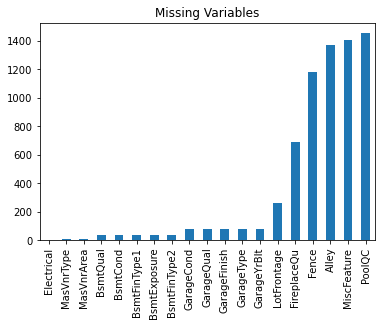

In [9]:
na_train.sort_values(inplace=True)
na_train.plot.bar()
plt.title("Missing Variables")
plt.show()

/Users/sherrytp/opt/anaconda3/envs/ml4t/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

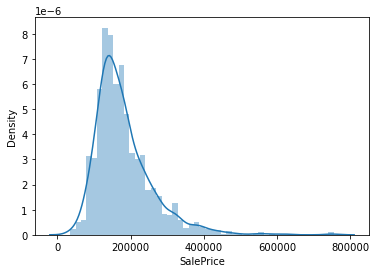

In [10]:
sns.distplot(train['SalePrice'])

/Users/sherrytp/opt/anaconda3/envs/ml4t/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/sherrytp/opt/anaconda3/envs/ml4t/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/sherrytp/opt/anaconda3/envs/ml4t/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a

<AxesSubplot:title={'center':'Log Normal'}, xlabel='SalePrice'>

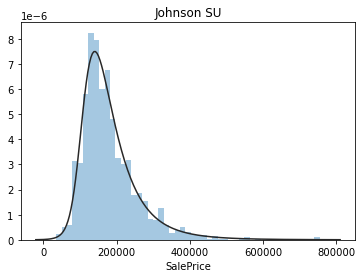

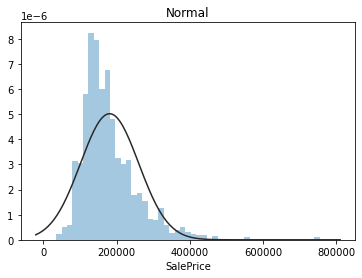

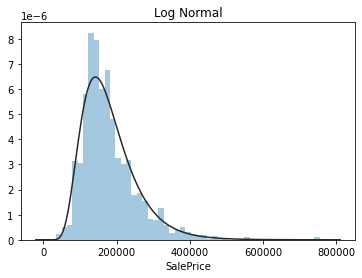

In [11]:
# Fit some distribution on SalePrice 

import scipy.stats as st
plt.figure(1); plt.title('Johnson SU')
sns.distplot(train['SalePrice'], kde=False, fit=st.johnsonsu)
plt.figure(2); plt.title('Normal')
sns.distplot(train['SalePrice'], kde=False, fit=st.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(train['SalePrice'], kde=False, fit=st.lognorm)

<AxesSubplot:>

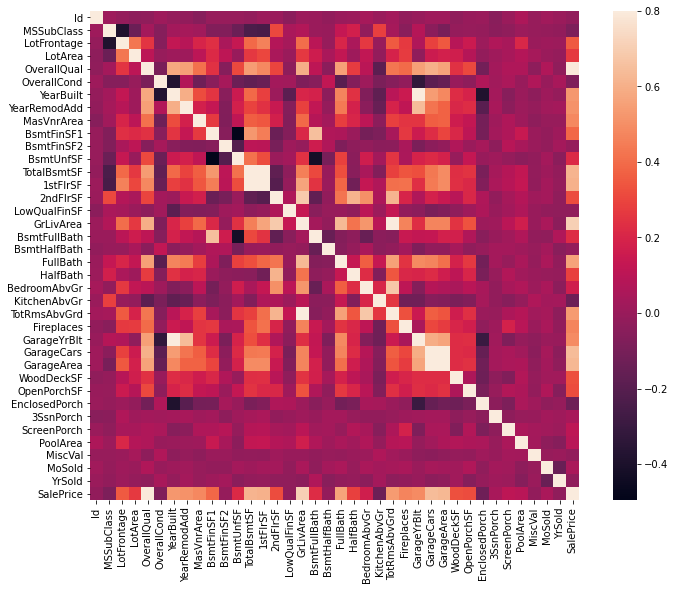

In [12]:
# Correlation Matrix 

train_corr = train.corr()
f, ax = plt.subplots(figsize = (12, 9))
sns.heatmap(train_corr, vmax = 0.8, square = True)

In [13]:
train_corr.style

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,-0.005968,-0.007940,-0.015415,0.010496,0.005590,-0.044230,0.008273,0.002289,-0.020155,0.005587,0.006784,0.037719,0.002951,0.027239,-0.019772,0.000072,0.016570,0.017634,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,0.085072,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,0.132644,0.392075,0.457181,0.080177,0.038469,0.402797,0.100949,-0.007234,0.198769,0.053532,0.263170,-0.006069,0.352096,0.266639,0.070250,0.285691,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,-0.024947,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.547766,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.324297,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.825667,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.642277,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,0.114442,0.363936,0.344501,0.174561,-0.069071,0.390857,0.085310,0.026673,0.276833,0.201444,0.102821,-0.037610,0.280682,0.249070,0.252691,0.364204,0.373066,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.153484,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451

`OverallQual`, `GrLivArea`, `TotalBsmtSF`, `YearBuilt`, `1stFlrSF`, `FullBath`, `TotRmsAbvGrd`, `GarageCars`, `GarageArea`, `YearRemodAdd` 

> But `GarageCars` is highly correlated to `GarageArea` too. 
> `TotRmsAbvGrd` and `GrLivArea` 
> `1stFlrSF` and `TotalBsmtSF` 

`OverallQual`, `GrLivArea`, `TotalBsmtSF`, `YearBuilt`, `FullBath`, `GarageCars`, `YearRemodAdd` 

In [14]:
cols = ['OverallQual', 'GrLivArea', 'TotalBsmtSF','YearBuilt',
        'FullBath', 'GarageCars', 'YearRemodAdd']
train[cols].corr().style

,OverallQual,GrLivArea,TotalBsmtSF,YearBuilt,FullBath,GarageCars,YearRemodAdd
OverallQual,1.000000,0.593007,0.537808,0.572323,0.550600,0.600671,0.550684
GrLivArea,0.593007,1.000000,0.454868,0.199010,0.630012,0.467247,0.287389
TotalBsmtSF,0.537808,0.454868,1.000000,0.391452,0.323722,0.434585,0.291066
YearBuilt,0.572323,0.199010,0.391452,1.000000,0.468271,0.537850,0.592855
FullBath,0.550600,0.630012,0.323722,0.468271,1.000000,0.469672,0.439046
GarageCars,0.600671,0.467247,0.434585,0.537850,0.469672,1.000000,0.420622
YearRemodAdd,0.550684,0.287389,0.291066,0.592855,0.439046,0.420622,1.000000


/Users/sherrytp/opt/anaconda3/envs/ml4t/lib/python3.8/site-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


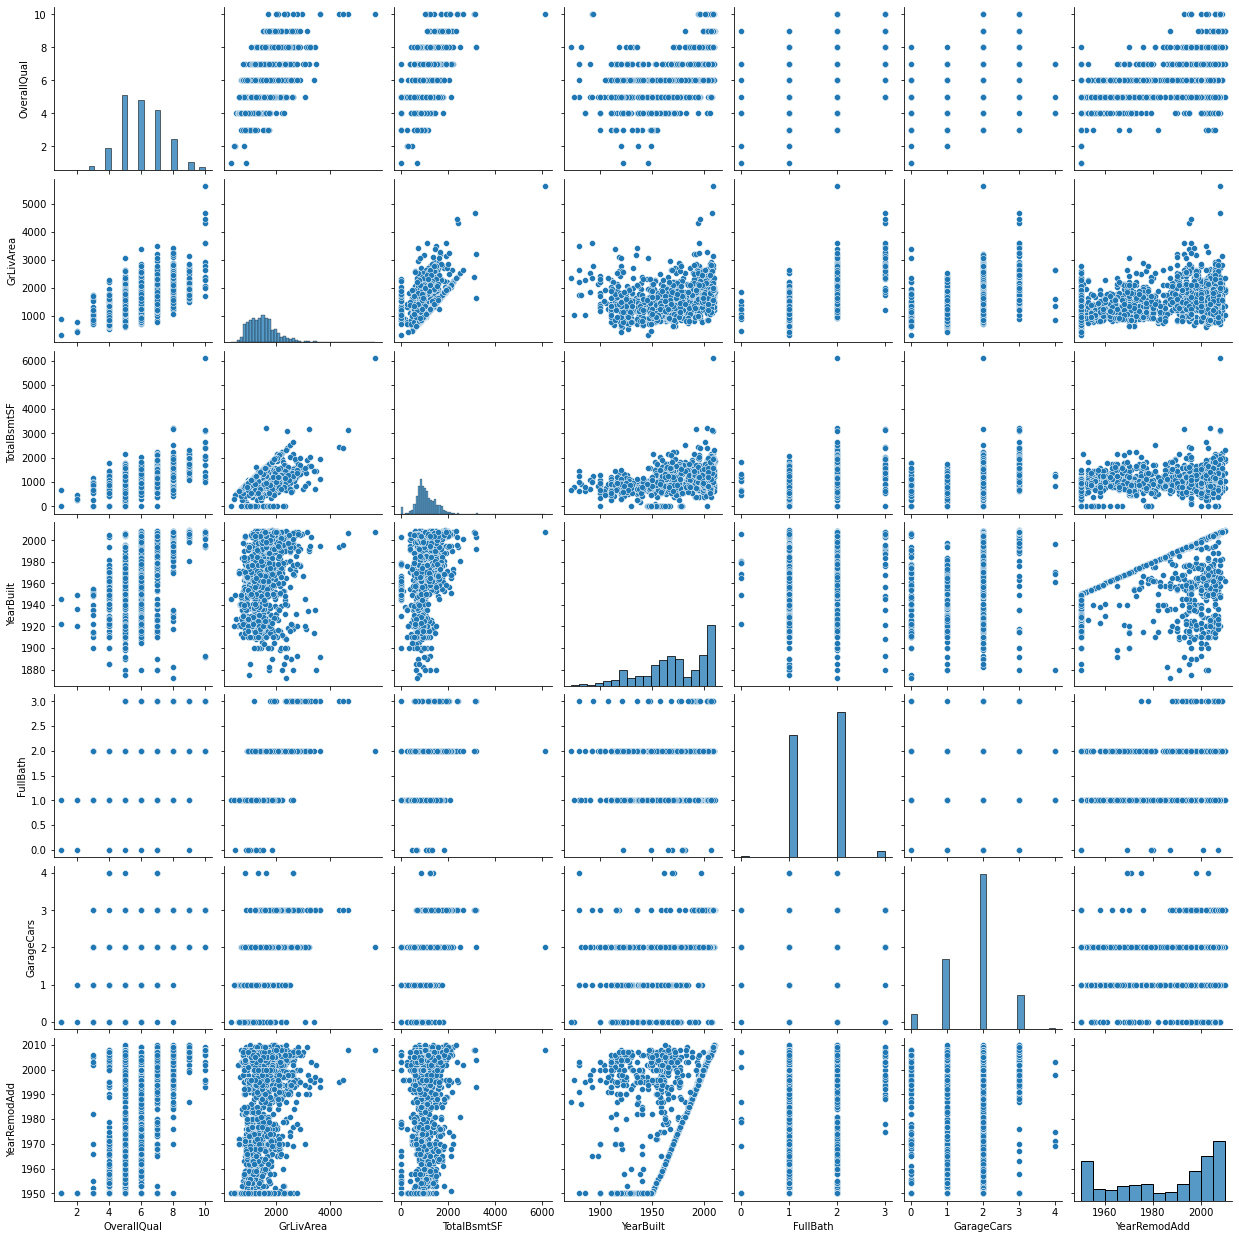

In [15]:
sns.pairplot(train[cols], size = 2.5)
plt.show()

/Users/sherrytp/opt/anaconda3/envs/ml4t/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/sherrytp/opt/anaconda3/envs/ml4t/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/sherrytp/opt/anaconda3/envs/ml4t/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a

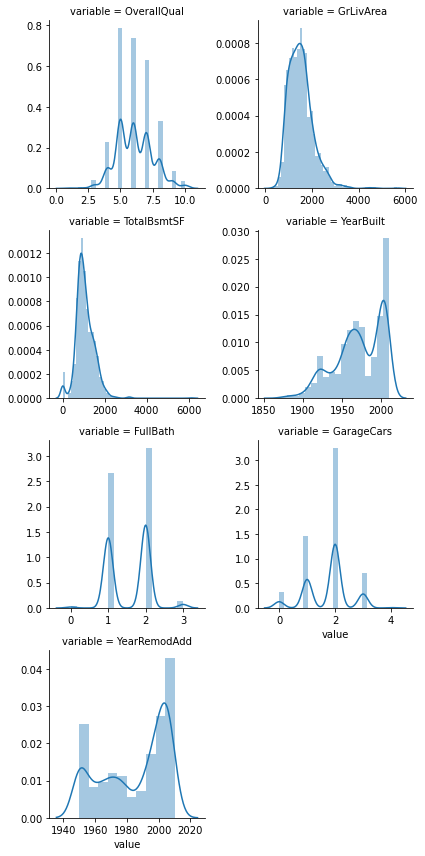

In [16]:
f = pd.melt(train, value_vars=cols)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

### Categorial Data Manipulation 

In [17]:
qual = qualitative = [f for f in train.columns if train.dtypes[f] == 'object']
print(train_corr.shape)
print(len(qual))

(38, 38)
43


/Users/sherrytp/opt/anaconda3/envs/ml4t/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


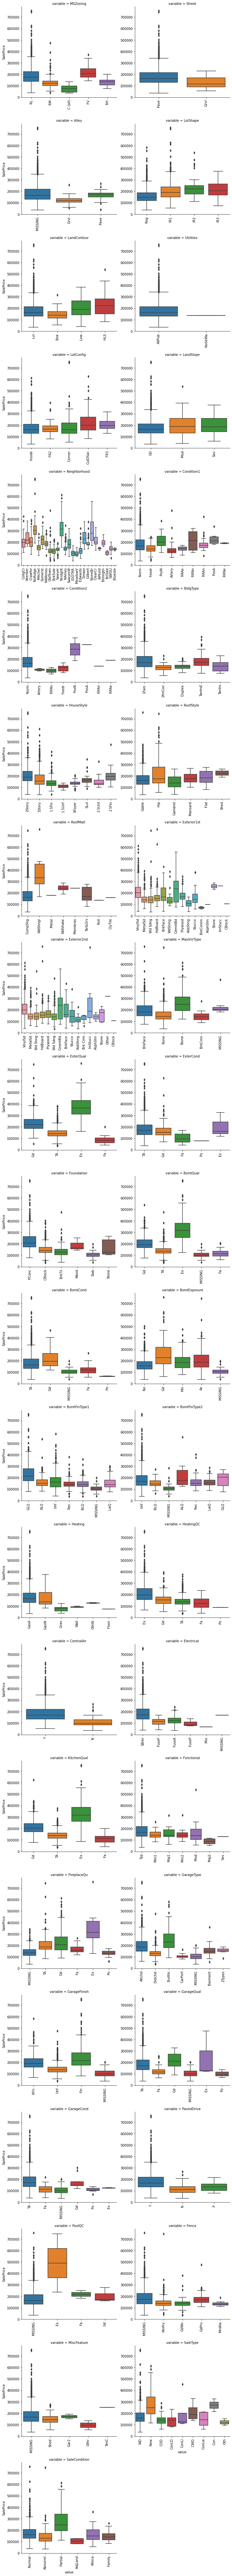

In [18]:
for c in qualitative:
    train[c] = train[c].astype('category')
    if train[c].isnull().any():
        train[c] = train[c].cat.add_categories(['MISSING'])
        train[c] = train[c].fillna('MISSING')

def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
f = pd.melt(train, id_vars=['SalePrice'], value_vars=qualitative)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(boxplot, "value", "SalePrice")

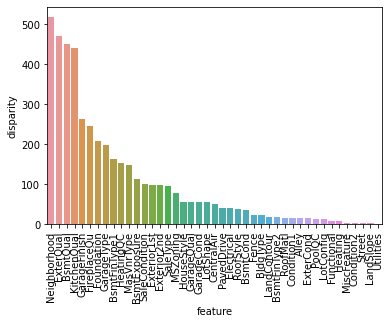

In [19]:
def anova(frame):
    anv = pd.DataFrame()
    anv['feature'] = qualitative
    pvals = []
    for c in qualitative:
        samples = []
        for cls in frame[c].unique():
            s = frame[frame[c] == cls]['SalePrice'].values
            samples.append(s)
        pval = stats.f_oneway(*samples)[1]
        pvals.append(pval)
    anv['pval'] = pvals
    return anv.sort_values('pval')

a = anova(train)
a['disparity'] = np.log(1./a['pval'].values)
sns.barplot(data=a, x='feature', y='disparity')
x=plt.xticks(rotation=90)

`Neighborhood`, `ExterQual`

> How to write encode? 

In [20]:
y = train['SalePrice']
x = train[cols]

ridge = linear_model.RidgeCV(cv = 10)
ridge.fit(x, y)
y_pred = ridge.predict(x)

def error(actual, predicted): 
    return np.sqrt(np.sum(np.square(actual - predicted)))/len(actual)

print(error(y, y_pred))

992.4879048651103


In [21]:
RFreg = RandomForestRegressor(max_depth=2, random_state=0,n_estimators=100)
RFreg.fit(x, y)
y_pred = RFreg.predict(x)
print(error(y, y_pred))

1144.4837428639541


In [22]:
print(test[cols].isnull().sum())
TBsmtSF_avg = test['TotRmsAbvGrd'].mean()
test['TotalBsmtSF'] = test['TotalBsmtSF'].fillna(TBsmtSF_avg)
GarCars_avg = test['GarageCars'].mean()
test['GarageCars'] = test['GarageCars'].fillna(GarCars_avg)

OverallQual     0
GrLivArea       0
TotalBsmtSF     1
YearBuilt       0
FullBath        0
GarageCars      1
YearRemodAdd    0
dtype: int64


In [27]:
import h2o
from h2o.automl import H2OAutoML
h2o.init()

# train['SalePrice'] = y_train
htrain = h2o.H2OFrame(train)
htest = h2o.H2OFrame(test)
x = htrain.columns
y = "SalePrice"
x.remove(y)

# train the model for 2-3 hours instead of 20 seconds
aml = H2OAutoML(max_runtime_secs = 3600, seed = 1) 
aml.train(x=x, y =y, training_frame=htrain)
lb = aml.leaderboard
print (lb)
print("generate predictions")
pred_y = aml.leader.predict(htest)
# pred_y = test_y.as_data_frame()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,4 hours 26 mins
H2O_cluster_timezone:,America/Los_Angeles
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.1.3
H2O_cluster_version_age:,"28 days, 5 hours and 34 minutes"
H2O_cluster_name:,H2O_from_python_sherrytp_kij7j4
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,13.41 Gb
H2O_cluster_total_cores:,24
H2O_cluster_allowed_cores:,24
H2O_cluster_status:,"locked, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
AutoML progress: |████████████████████████████████████████████████████████| 100%


model_id,mean_residual_deviance,rmse,mse,mae,rmsle
GBM_grid__1_AutoML_20210616_233421_model_6,7.17729e+08,26790.5,7.17729e+08,15894.2,0.131461
StackedEnsemble_BestOfFamily_AutoML_20210616_233421,7.22986e+08,26888.4,7.22986e+08,15036.1,0.124531
GBM_grid__1_AutoML_20210616_233421_model_17,7.28889e+08,26998,7.28889e+08,15716.5,0.131119
GBM_grid__1_AutoML_20210616_233421_model_12,7.36643e+08,27141.2,7.36643e+08,15690.8,0.129626
GBM_grid__1_AutoML_20210616_233421_model_5,7.42137e+08,27242.2,7.42137e+08,15898.7,0.13033
GBM_grid__1_AutoML_20210616_233421_model_7,7.47034e+08,27331.9,7.47034e+08,15922.4,0.132343
GBM_grid__1_AutoML_20210616_233421_model_16,7.52568e+08,27433,7.52568e+08,15850.8,0.130841
GBM_1_AutoML_20210616_233421,7.53405e+08,27448.2,7.53405e+08,16245.6,0.133013
GBM_grid__1_AutoML_20210616_233421_model_14,7.7476e+08,27834.5,7.7476e+08,16094.2,0.132206
GBM_grid__1_AutoML_20210616_233421_model_4,7.78e+08,27892.7,7.78e+08,16071.9,0.132514



generate predictions
gbm prediction progress: |████████████████████████████████████████████████| 100%


In [32]:
pred_y = ridge.predict(test[cols])
sub['SalePrice'] = pred_y
sub.to_csv("sample_submission.csv")